In [217]:
import cv2
from setup import out_dir, data_dir, image_dir, model_dir
import glob
import matplotlib.pyplot as plt
import numpy as np
import lpips
import torch
import torchvision
import util_image

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
image_list = glob.glob(image_dir+'zoom15/*.png')

image_list = sorted(image_list)

In [5]:
lpips_alex = lpips.LPIPS(net="alex")

Setting up [LPIPS] perceptual loss: trunk [alex], v[0.1], spatial [off]


/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=AlexNet_Weights.IMAGENET1K_V1`. You can also use `weights=AlexNet_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Loading model from: /home/jtl/anaconda3/envs/qingyi/lib/python3.8/site-packages/lpips/weights/v0.1/alex.pth


In [42]:
idx = np.arange(100,110)

In [101]:
[image_list[i] for i in idx]

['/dreambig/qingyi/image_chicago/data/images/satellite/zoom15/17_111_870603_1.png']

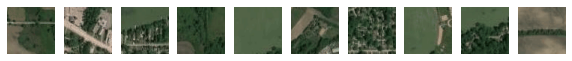

In [44]:
imt = []
fig, ax = plt.subplots(1,len(idx), figsize=(len(idx),1))
for i,j in enumerate(idx):
    im = util_image.center_crop(lpips.load_image(image_list[j]), (64,64))
    ax[i].imshow(im)

    imt.append(lpips.im2tensor(im))
    ax[i].axis('off')

In [54]:
l = []
for i in range(10):
    l.append([])
    for j in range(10):
        l[i].append(lpips_alex(imt[i],imt[j]).detach().numpy().flatten()[0])
    
l = np.array(l)
l.shape

In [92]:
images = []
for i in range(10):
    order = np.argsort(l[i])
    for j in order:
#         images.append(util_image.single_image_to_tensor_input(image_list[idx[j]],64))
        images.append(lpips.im2tensor(util_image.center_crop(lpips.load_image(image_list[idx[j]]), (64,64))))

(-0.5, 661.5, 661.5, -0.5)

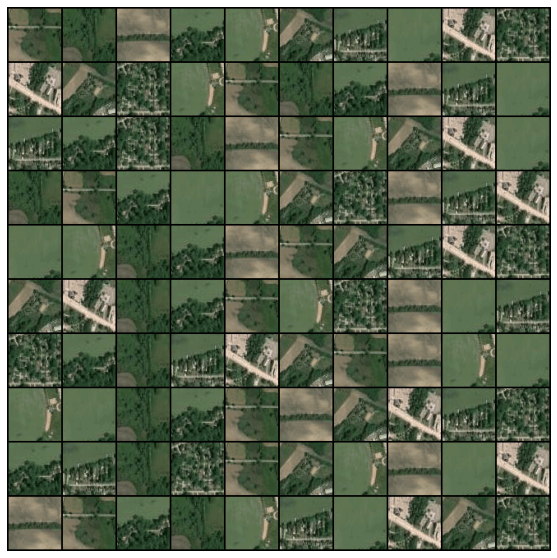

In [99]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(torchvision.utils.make_grid(torch.cat(images), nrow=10, normalize=True).permute(1,2,0).numpy())
ax.axis('off')

In [232]:
idx = np.arange(100, 110)

In [236]:
def return_transformed(im):
    im_rotate20 = torchvision.transforms.functional.rotate(im, 20)
    im_rotate90 = torchvision.transforms.functional.rotate(im, 90)

    blur = torchvision.transforms.GaussianBlur(kernel_size=25, sigma=1)
    im_blur1 = blur(im)
    blur = torchvision.transforms.GaussianBlur(kernel_size=25,sigma=3)
    im_blur2 = blur(im)
    blur = torchvision.transforms.GaussianBlur(kernel_size=25,sigma=10)
    im_blur3 = blur(im)
    
    imt = [im, im_rotate20, im_rotate90, im_blur1, im_blur2, im_blur3]
    
    ret = []
    for i in imt:
        ret.append(util_image.center_crop(i[0], (64,64), im_type='tensor')[None,:,:,:])
    ret = torch.cat(ret)
    
    return ret

In [237]:
imt = []

for i in idx:
    imt.append(return_transformed(lpips.im2tensor(lpips.load_image(image_list[i]))))

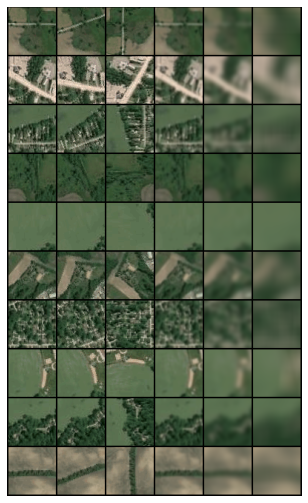

In [238]:
num_row, num_col = len(imt), 6

fig, ax = plt.subplots(1,1, figsize=(1.5*num_row, 1.5*num_col))
ax.imshow(torchvision.utils.make_grid(torch.cat(imt), nrow=num_col, normalize=True).permute(1,2,0).numpy())
ax.axis('off');

In [242]:
l = []
for i in range(num_row):
    l.append([])
    for j in range(num_col):
        l[i].append(lpips_alex(imt[i][0],imt[i][j]).detach().numpy().flatten()[0])
    
l = np.array(l)
l.shape

(10, 6)

In [249]:
images = []
for i in range(num_row):
    order = np.argsort(l[i])
    for j in order:
        images.append(imt[i][j][None,:,:,:])

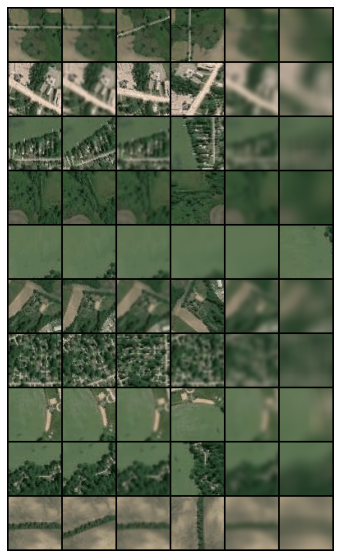

In [252]:
fig, ax = plt.subplots(1,1, figsize=(num,num))
ax.imshow(torchvision.utils.make_grid(torch.cat(images), nrow=num_col, normalize=True).permute(1,2,0).numpy())
ax.axis('off');